In [1]:
import gym
import copy
import numpy as np
import time as time
import torch
import torch.nn as nn
import gym_flappyBird
import genetics as gen
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import math
import pygame
from pygame.locals import *

pygame 2.0.2 (SDL 2.0.16, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Maschine

<img src="sprites/bestaerkendes-lernen.png" align="left" >

## Feature extrahieren

<img src="sprites/ingame.jpg" align="left" >

In [2]:
def generateFeatures(state):
    bird = state['bird']
    #print(type(bird))
    posY = bird.Y
    speedY = bird.speedY
    pipes = state['pipes']
    #print(pipes[0].pos)
    return posY, speedY, pipes[0].pos,pipes[0].height,pipes[0].gap

# Neuronales Netz 

## Layer
nn.Linear(X, Y), Input dim X, Output dim Y

## Aktivierungsfunktionen
nn.ReLU()


nn.Sigmoid()


nn.Softmax(dim=1))



## Topologie
nn.Sequential(Layer, Aktivierungsfunktion, Layer, Aktivierungsfunktion...., Layer)
###### Beispiel
nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 1))

### https://pytorch.org/docs/stable/nn.html#linear-layers
### https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html?highlight=sigmoid#torch.nn.Sigmoid


In [3]:
net = nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 5),nn.Sigmoid(), nn.Linear(5, 1))

In [4]:
for name, param in net.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[ 0.1710, -0.0914, -0.0665,  0.1205, -0.2722],
        [-0.2948,  0.3871,  0.0634, -0.0285, -0.1507],
        [-0.3732, -0.4136, -0.1448,  0.1250, -0.3022],
        [ 0.2724,  0.3306, -0.3433,  0.2651,  0.1825],
        [ 0.0157, -0.0707,  0.2361, -0.2890,  0.0116]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.1037,  0.0800, -0.1373,  0.4178,  0.2819], requires_grad=True)
2.weight Parameter containing:
tensor([[ 0.2400,  0.2017,  0.2437,  0.2819,  0.4449],
        [ 0.1911, -0.1670,  0.3098,  0.2698, -0.2005],
        [ 0.1388,  0.1238, -0.0487, -0.3524,  0.0012],
        [-0.0849, -0.0763,  0.0701, -0.0925, -0.0585],
        [-0.3236, -0.1479, -0.4334,  0.0371,  0.3699]], requires_grad=True)
2.bias Parameter containing:
tensor([ 0.2255,  0.2479, -0.4357, -0.2402,  0.3933], requires_grad=True)
4.weight Parameter containing:
tensor([[-0.0276,  0.3163, -0.0766, -0.1413,  0.3483]], requires_grad=True)
4.bias Parameter containing:
tens

# Aktion festlegen

  
## Bird attributes

### bird.forceX 
### bird.forceY 

### bird.speedX  (default 20)
### bird.speedY

In [5]:
def birdAction(decission, bird):
        bird.forceY =50*decission[0]


## Reward  berechnen

<img src="sprites/ingame_2.jpg" align="left" >

In [6]:
def computeReward(state_old, state_new):
    return 1

# Mutationsparameter

<img src="sprites/ingame_3.jpg" align="left" >

In [7]:
POPULATION_SIZE = 50 #Anzahl der Vögel in der Population
PARENTS_COUNT = 10 #Anzahl der besten Vögel, aus denen dann mutiert wird
NOISE_STD = 0.1 #Mutationsstärke 

## Abstand zwischen den Pipes,  Höhe der Pipes, Grösse der Lücke

In [8]:
Interval_distance = [250, 350]
Interval_height = [100,300]
Interval_gap = [120,130]

## Max Score

In [9]:
Score_Max = 4000

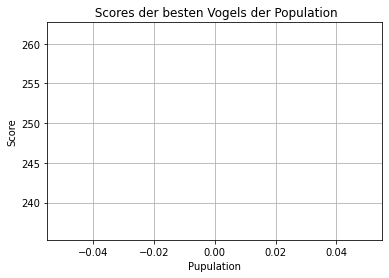

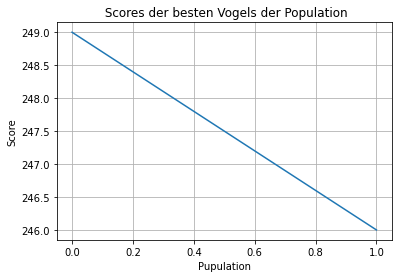

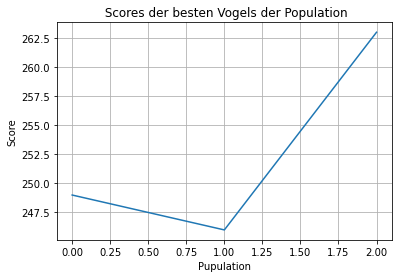

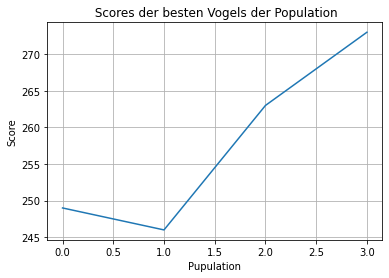

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  5
____________________________________________________________________________
Score Training:  216.0  Score Spiel:  73.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.1322,  0.1170, -0.2554,  0.1130, -0.1613],
        [-0.3559,  0.1504,  0.2044, -0.2687,  0.1162],
        [-0.0010, -0.2603, -0.5987,  0.6331, -0.4025],
        [ 0.1381,  0.3642, -0.0387,  0.1454,  0.0674],
        [ 0.4036, -0.1206,  0.4095, -0.2004,  0.2090]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.0014,  0.1052, -0.3194,  0.6833,  0.1976], requires_grad=True)
2.weight Parameter containing:
tensor([[ 0.3884, -0.1051,  0.4820,  0.3835,  0.3034],
        [ 0.1822,  0.0623,  0.2636,  0.6079, -0.3492],
        [-0.0390,  0.1772,  0.1882, -0.3061, -0.1321]

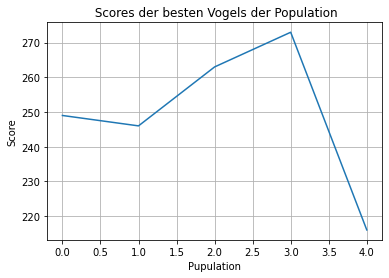

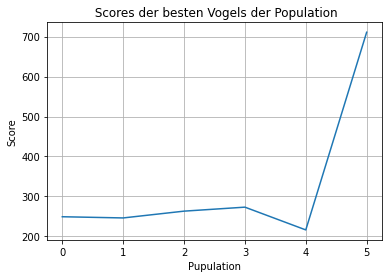

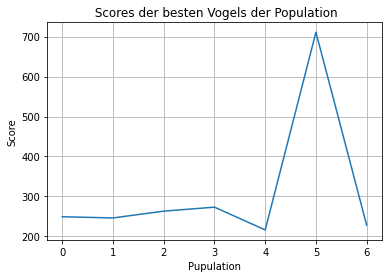

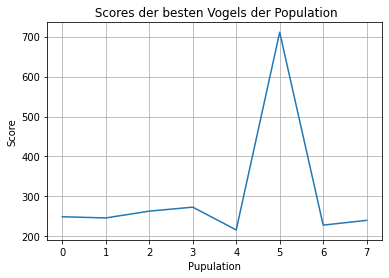

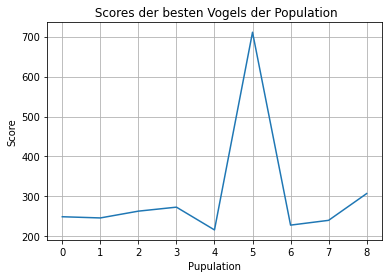

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  10
____________________________________________________________________________
Score Training:  677.0  Score Spiel:  72.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.2688, -0.0735, -0.2729,  0.0954, -0.7028],
        [-0.2464, -0.1475,  0.4501,  0.1094, -0.6206],
        [-0.2987, -0.0826, -0.1235, -0.0184, -0.0287],
        [ 0.2134,  0.1861,  0.0038, -0.0416,  0.3948],
        [ 0.0254,  0.4124,  0.2160, -0.4115,  0.1388]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.1604, -0.0172, -0.0259,  0.1095, -0.0178], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.1361,  0.2912,  0.0820,  0.3047,  0.6300],
        [-0.2717, -0.0909,  0.1641,  0.3862, -0.3344],
        [ 0.1857,  0.4549, -0.0463, -0.5643,  0.2534

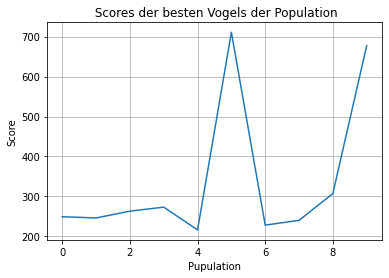

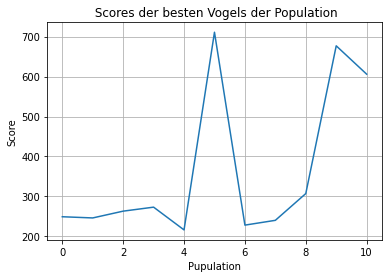

KeyboardInterrupt: 

In [10]:
fittestBirds = []

env = gym.make("scienceCampBird-v1")
env.setPipeIntervals([Interval_distance, Interval_height,Interval_gap])
population = gen.Population(POPULATION_SIZE, 5, 2, computeReward, net)
env.setAction(birdAction)
  #  print(len(population.nets))
population.evaluate_on_env(env,generateFeatures, Score_Max)
ecount = 0  
while True:
    population = gen.mutate_population(population, PARENTS_COUNT, NOISE_STD)
    population.evaluate_on_env(env, generateFeatures, Score_Max)
    fittestBirds.append(population.population[0])
    ecount +=1
    if(ecount % 5 == 0):
        print("evaluaton")
        net = population.population[0][1]
        score_e = population.population[0][0]
        score_p = env.playWithNet(net, generateFeatures, Score_Max, computeReward, ecount)
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', ecount)
        print("____________________________________________________________________________")
        print('Score Training: ', score_e, ' Score Spiel: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)
    scores = [score[0] for score in fittestBirds]
    fig, ax = plt.subplots()
    ax.plot(scores)

    ax.set(xlabel='Pupulation', ylabel='Score',
    title=' Scores der besten Vogels der Population')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

# Plott

In [1]:
scores = [score[0] for score in fittestBirds]
fig, ax = plt.subplots()
ax.plot(scores)

ax.set(xlabel='Pupulation', ylabel='Score',
       title=' Scores der besten Vogels der Population')
ax.grid()

fig.savefig("test.png")
plt.show()

NameError: name 'fittestBirds' is not defined

In [ ]:
i = 0
for bird in fittestBirds:
        i +=1
        net = bird[1]
        score_p = bird[0]
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', i)
        print("____________________________________________________________________________")
        print('Score: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)

# Animation

Hintergrund: sprites/background-day.png

<img src="sprites/background-day.png" align="left" >

Bird: 

sprites/sparrow/sparrow.png, sprites/sparrow/sparrow_flap.png

<img src="sprites/sparrow/sparrow.png" align="left" >
<img src="sprites/sparrow/sparrow_flap.png" align="left" >